<a href="https://colab.research.google.com/github/opc51/AIML/blob/main/Image_Classification_CNN_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this document is to build a computer vision model to classify plant species. CNN and Keras will be used.

# Inital Load data (5 marks)

## Import Libraries

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import pandas as pd
from tensorflow import keras

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Conv1D

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

## Load dataset

Use Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the Images

In [ ]:
import numpy as np
color_img_array = np.load('/content/drive/My Drive/Colab Notebooks/images.npy')

Load the labels

In [ ]:
img_labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')

The dataset has now been loaded

## Print shape of data

In [ ]:
color_img_array.shape

(4750, 128, 128, 3)

We have  4750 images. Each image is of size 128 by 128. The images are color.

In [ ]:
img_labels.shape

(4750, 1)

We have 4750 labels. Thankfully the number of labels matches the number of  images.

## Visualize images in the dataset

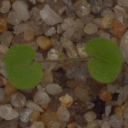

None

'Small-flowered Cranesbill'

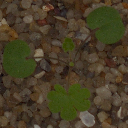

None

'Small-flowered Cranesbill'

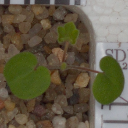

None

'Small-flowered Cranesbill'

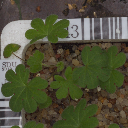

None

'Small-flowered Cranesbill'

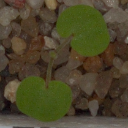

None

'Small-flowered Cranesbill'

In [ ]:
i = 0
while i < 5:
  display(cv2_imshow(color_img_array[i]))
  display(img_labels.iloc[i][0])
  i += 1

The images have loaded correctly. 

These images look as though they will be very hard to work with. The backdrop of stones could create many false features.

# Data PreProcessing (15 marks)

## Normalization

Normalization can mean two things in relation to Computer Vision.

1.   Converting images to greyscale
2.   Making all data have values between 0 - 1

### Greyscale Discussion
As you will see, I did make the images grey scale. I however did not use these greyscale images. The similarty been the background and the plants will make spotting the important objects different.

If we use color images the plant boundary may be clearer on the green images. One possible solution would be to drop the Red and Blue parts of the image and classify using only the green component of the image.

### Numerical Normalization
This will be done in the section Split the data into training testing and validation.




In [ ]:
greyscale_img_list = []

# loop round each image
for color_image in color_img_array:
  # covert to grey
  grey_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
  # append to array
  greyscale_img_list.append(grey_image)

# make it a numpy array again
greyscale_img_array = np.array(greyscale_img_list)



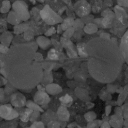

None

'Small-flowered Cranesbill'

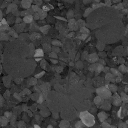

None

'Small-flowered Cranesbill'

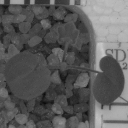

None

'Small-flowered Cranesbill'

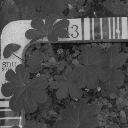

None

'Small-flowered Cranesbill'

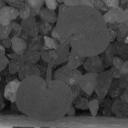

None

'Small-flowered Cranesbill'

In [ ]:
# check results
i = 0
while i < 5:
  display(cv2_imshow(greyscale_img_array[i]))
  display(img_labels.iloc[i][0])
  i += 1

The images are now greyscale.

## Gaussian Blurring

Gaussian Bluring is done to reduce noise in a picture so that features become easier to see.

We will first decide upon the level of blurring to use.

We will be using color images for the reason stated above

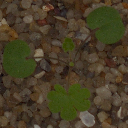

None

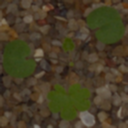

None

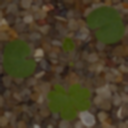

None

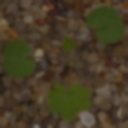

None

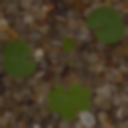

None

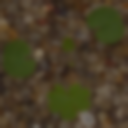

None

In [ ]:
# choose what level of blurring to use
pre_blur_image = color_img_array[1] #greyscale_img_array[1]

option3by3 = cv2.GaussianBlur(pre_blur_image, (3, 3), 0)
option5by5 = cv2.GaussianBlur(pre_blur_image, (5, 5), 0)
option7by7 = cv2.GaussianBlur(pre_blur_image, (7, 7), 0)
option9by9 = cv2.GaussianBlur(pre_blur_image, (9, 9), 0)
option13by13 = cv2.GaussianBlur(pre_blur_image, (13, 13), 0)

display(cv2_imshow(pre_blur_image))
display(cv2_imshow(option3by3))
display(cv2_imshow(option5by5))
display(cv2_imshow(option7by7))
display(cv2_imshow(option9by9))
display(cv2_imshow(option13by13))


Option 9 by 9 looks the best.

In [ ]:
blurred_images_list = []

for clear_image in color_img_array:   #greyscale_img_array:
    #blur the image
    blurred_image = cv2.GaussianBlur(clear_image, (9, 9), 0)
    #add image to array
    blurred_images_list.append(blurred_image)


#convert from list to np array
blurred_images_array = np.array(blurred_images_list)


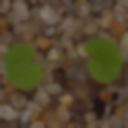

None

'Small-flowered Cranesbill'

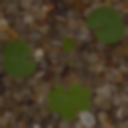

None

'Small-flowered Cranesbill'

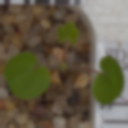

None

'Small-flowered Cranesbill'

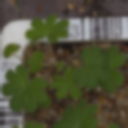

None

'Small-flowered Cranesbill'

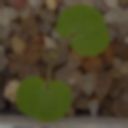

None

'Small-flowered Cranesbill'

In [ ]:
#check results
i = 0
while i < 5:
  display(cv2_imshow(blurred_images_array[i]))
  display(img_labels.iloc[i][0])
  i += 1

The images have been successfully blurred

## Visualise Data After Pre Processing

The images have already been visualised in the Normalization and Gaussian Blurring sections.

It is however repeated here for completeness.

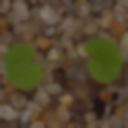

None

'Small-flowered Cranesbill'

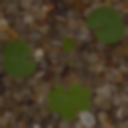

None

'Small-flowered Cranesbill'

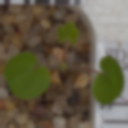

None

'Small-flowered Cranesbill'

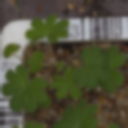

None

'Small-flowered Cranesbill'

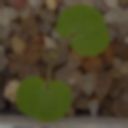

None

'Small-flowered Cranesbill'

In [ ]:
i = 0
while i < 5:
  display(cv2_imshow(blurred_images_array[i]))
  display(img_labels.iloc[i][0])
  i += 1

As we can see all images have been and blurred

In [ ]:
img_labels.nunique()

Label    12
dtype: int64

In [ ]:
img_labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

We were promissed 12 labels. We have recieved 12 label.

The data is not unifrom, we have different numbers of photos of each plant type. We would expect this to result in  better classification of the most commonly occurring plants.

# Make Data Compatible

## Convert Labels to one-hot-vectors

In [ ]:
img_labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


All looks good. Make the names into numbers.

In [ ]:
img_labels["Label"].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [ ]:
number_labels = {"Label" : 
                  {
                      'Small-flowered Cranesbill' : 0, 
                      'Fat Hen' : 1, 
                      'Shepherds Purse' : 2,
                      'Common wheat' : 3, 
                      'Common Chickweed' : 4, 
                      'Charlock' : 5, 
                      'Cleavers' : 6,
                      'Scentless Mayweed' : 7, 
                      'Sugar beet' : 8, 
                      'Maize' : 9, 
                      'Black-grass' : 10,
                      'Loose Silky-bent' : 11
                  }
}
number_labels

{'Label': {'Black-grass': 10,
  'Charlock': 5,
  'Cleavers': 6,
  'Common Chickweed': 4,
  'Common wheat': 3,
  'Fat Hen': 1,
  'Loose Silky-bent': 11,
  'Maize': 9,
  'Scentless Mayweed': 7,
  'Shepherds Purse': 2,
  'Small-flowered Cranesbill': 0,
  'Sugar beet': 8}}

In [ ]:
img_labels.replace(number_labels, inplace=True)
img_labels.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [ ]:
img_labels.dtypes

Label    int64
dtype: object

In [ ]:
img_labels = img_labels["Label"].astype('category')
img_labels

0        0
1        0
2        0
3        0
4        0
        ..
4745    11
4746    11
4747    11
4748    11
4749    11
Name: Label, Length: 4750, dtype: category
Categories (12, int64): [0, 1, 2, 3, ..., 8, 9, 10, 11]

In [ ]:
img_labels.dtypes

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ordered=False)

In [ ]:
y = keras.utils.to_categorical(img_labels, 12)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

The Y data has now been created.

## Split the data into Training, testing and validation

---



We have already created the target variable the Y data. This was done in the section "Convert Labels to one-hot vectors". 

In [ ]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

We now need to create the X data.

In the section called GaussianBlurring we created "blurred_images_array". This contains the images that have been blurred.

In [ ]:
display(blurred_images_array.min())
display(blurred_images_array.max())

0

255

As we can see this data is not normalized. The values are not in the range zero to one. We will resolve this now.



In [ ]:
blurred_images_array = blurred_images_array/255

In [ ]:
display(blurred_images_array.min())
display(blurred_images_array.max())

0.0

1.0

The data has now been numerically normalized. We will split the data into

1.   30% testing , 70% training
2.   The test data will be split 50/50 into testing and Validation

This will result in 70% training data, 15% test, 15% validation data


In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(blurred_images_array, y, test_size = 0.3, random_state = 88)

In [ ]:
print(X_train.shape)
print(X_test_val.shape)
print(y_train.shape)
print(y_test_val.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)
(3325, 12)
(1425, 12)


First split successful

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state = 88)

In [ ]:
print(X_test_val.shape)
print(X_test.shape)
print(X_val.shape)


print(y_test_val.shape)
print(y_test.shape)
print(y_val.shape)

(1425, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)
(1425, 12)
(712, 12)
(713, 12)


Second split sucessful

## Print the label for y_train[0]

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Check data shape , reshape if required

The shape of the data has already been checked however the code and conclusion is repeated here for completeness.

In [ ]:
print(blurred_images_array.shape)
print(X_train.shape)

print(y.shape)
print(y_train.shape)

print(X_test_val.shape)
print(X_test.shape)
print(X_val.shape)

print(y_test_val.shape)
print(y_test.shape)
print(y_val.shape)

(4750, 128, 128, 3)
(3325, 128, 128, 3)
(4750, 12)
(3325, 12)
(1425, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)
(1425, 12)
(712, 12)
(713, 12)


As we can see the code has been split in the required manner.

Reshape the data.

In [ ]:
X_train = X_train.reshape(X_train.shape[0],128,128,3)
X_test = X_test.reshape(X_test.shape[0],128,128,3)
X_val = X_val.reshape(X_val.shape[0],128,128,3)

#Build CNN

In [ ]:
X_train.shape[1:]

(128, 128, 3)

Needed to get the input layer the correct shape

## Define Layers

The layers used in this model have been restricted by the availability of RAM when running Google Collab.



In [ ]:
# Create the model
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(128, 128, 3), padding="same", activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(24, (3, 3), padding="same",activation='relu'))  #input_shape=(128, 128, 3)
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding="same",activation='relu')) #input_shape=(128, 128, 3)
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='softmax'))
 

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 64, 24)        3480      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 24)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)      

## Set optimizer and loss functions

In [ ]:
# initiate Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit, evaluate, predict, confusion matrix

In [ ]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [ ]:
model.fit(X_train, y_train,
          batch_size=400,
          epochs=100,
          validation_data=(X_val, y_val),
          shuffle=True,
          verbose=1,
          callbacks=[early_stopping,model_checkpoint])

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 2.3925 - accuracy: 0.1591
Epoch 00001: val_loss improved from 2.44898 to 2.44429, saving model to cifar_cnn_checkpoint_01_loss2.4443.h5
9/9 [==============================] - 41s 5s/step - loss: 2.3925 - accuracy: 0.1591 - val_loss: 2.4443 - val_accuracy: 0.1823
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 2.3819 - accuracy: 0.1699
Epoch 00002: val_loss improved from 2.44429 to 2.44085, saving model to cifar_cnn_checkpoint_02_loss2.4409.h5
9/9 [==============================] - 40s 4s/step - loss: 2.3819 - accuracy: 0.1699 - val_loss: 2.4409 - val_accuracy: 0.1585
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 2.3654 - accuracy: 0.1862
Epoch 00003: val_loss improved from 2.44085 to 2.43099, saving model to cifar_cnn_checkpoint_03_loss2.4310.h5
9/9 [==============================] - 41s 5s/step - loss: 2.3654 - accuracy: 0.1862 - val_loss: 2.4310 - val_accuracy: 0.1725
Epoch 4/10

The model is learning. Epoch by epoch we can see accuracy increasing from 15.91% to 50.35%.

The model has terminated on epoch 31 of 100. Th emodel is only learning at a very slow rate.

A new CNN design would need to be tried to improve on the situation

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 3s 125ms/step - loss: 2.1699 - accuracy: 0.3132
Test loss: 2.1698901653289795
Test accuracy: 0.31320226192474365


The accuracy of 31% is an improvement on the 8% that would be expected with "random answer selection"

There does appear to be overfitting as the test data is performing well below the training data.

In [ ]:
# make predictions
Y_pred = model.predict(X_test)
Y_pred

array([[7.5762502e-05, 1.7149197e-02, 2.5214147e-06, ..., 5.0389376e-06,
        3.9354548e-01, 4.5796233e-01],
       [8.1957728e-03, 9.9815890e-02, 5.2889962e-02, ..., 5.4338373e-02,
        1.9095860e-02, 4.6687804e-02],
       [2.5068009e-02, 1.4461902e-01, 4.2486567e-02, ..., 2.8746886e-02,
        7.9412676e-02, 9.9117011e-02],
       ...,
       [3.6605424e-01, 1.4164241e-01, 9.8160639e-02, ..., 7.4387535e-02,
        1.4523782e-03, 6.0646213e-03],
       [1.0050231e-03, 3.4487892e-02, 7.3105133e-05, ..., 4.2071686e-05,
        3.6474255e-01, 4.9453336e-01],
       [1.6516437e-03, 3.0100876e-02, 3.1629312e-04, ..., 2.1665212e-04,
        3.1076667e-01, 5.3203005e-01]], dtype=float32)

Y_pred contains an array with the percentage chance of each opton being choosen. This needs to be turned into an actual prediction and put into a format useable by a confusion matrix.

In [ ]:
y_predicted_values = []

i = 0;

for arg in y_test:
  y_predicted_values.append(np.argmax(Y_pred[i]))
  i = i + 1;

Test vales need to be in the same format

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_test_number= []

i = 0;

for arg in y_test:
  X_test_number.append(np.argmax(y_test[i]))
  i = i + 1;

In [ ]:
print(confusion_matrix(X_test_number, y_predicted_values))

[[ 26   5   0   0   3   2   3   0   0   0   5  33]
 [  0   3   0   0   1   1   0   0   0   0   7  59]
 [  2   5   0   0   7   0   3   5   0   0   0   8]
 [  0   0   0   0   0   0   0   0   0   0   0  29]
 [  2  12   0   0  30   0   0   9   0   0   3  27]
 [  2   3   0   2   1  18   7   7   0   0  15  12]
 [  0   1   0   0   0   0   5   4   0   0   5  25]
 [  0   5   0   1   3   1   2  27   0   0   3  31]
 [  0   0   0   0   0   0   0   0   0   0   3  48]
 [  1   3   0   0   8   1   0  10   1   3   9   9]
 [  0   0   0   0   0   0   0   0   0   0  11  30]
 [  0   0   0   0   0   0   0   1   0   0   4 100]]


This is possibly the worst confusion matrix I have ever produced!

Class 11 - Loose Silky-bent is being predicted in the majority of cases. It is also being predicted wrong most of the time!

In [ ]:
number_labels

{'Label': {'Black-grass': 10,
  'Charlock': 5,
  'Cleavers': 6,
  'Common Chickweed': 4,
  'Common wheat': 3,
  'Fat Hen': 1,
  'Loose Silky-bent': 11,
  'Maize': 9,
  'Scentless Mayweed': 7,
  'Shepherds Purse': 2,
  'Small-flowered Cranesbill': 0,
  'Sugar beet': 8}}

# Visualizes specific predictions

In [ ]:
print(Y_pred[2].argmax())
print(Y_pred[3].argmax())
print(Y_pred[33].argmax())
print(Y_pred[36].argmax())
print(Y_pred[39].argmax())

1
11
11
11
11


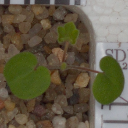

None

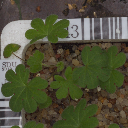

None

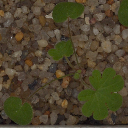

None

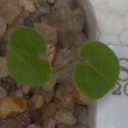

None

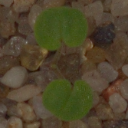

None

In [ ]:
display(cv2_imshow(color_img_array[2]))
display(cv2_imshow(color_img_array[3]))
display(cv2_imshow(color_img_array[33]))
display(cv2_imshow(color_img_array[36]))
display(cv2_imshow(color_img_array[39]))

# Green Scale

The work in this section was an attempt to solve the problem with a novel method.

The  plants are green, the back ground is not. Theoretically it could be easier for the gradients to be spotted if the images were "greenscale".

In order to do this I removed the Red and Blue Components from the images. This would leave a green scale image where the strong green leaves would stand out very clearly against the back ground.

This could be compuattionally more efficent as we are reducing the number of colour channels from 3 to 1.

Unfortunately I have run out of time to complete the exploration.

In [ ]:
color_img_array.shape
green_img_array = color_img_array

In [ ]:
red_values = color_img_array[:,:,:,0]
blue_values = color_img_array[:,:,:,2]
green_values = color_img_array[:,:,:,1]
#blue_values.shape
#red_values.shape

In [ ]:
green_values.shape

(4750, 128, 128)

In [ ]:
green_img_array = green_values

In [ ]:
green_img_array[35]

array([[72, 69, 65, ..., 88, 88, 92],
       [75, 73, 70, ..., 85, 84, 85],
       [77, 76, 76, ..., 83, 81, 83],
       ...,
       [70, 70, 67, ..., 66, 67, 68],
       [72, 71, 71, ..., 68, 71, 66],
       [73, 73, 72, ..., 67, 71, 68]], dtype=uint8)

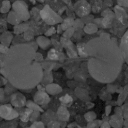

None

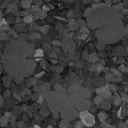

None

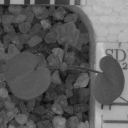

None

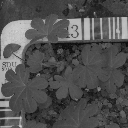

None

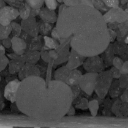

None

In [ ]:
i = 0
while i < 5:
  display(cv2_imshow(green_img_array[i]))
  ##display(img_labels.iloc[i][0])
  i += 1

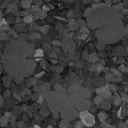

None

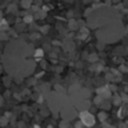

None

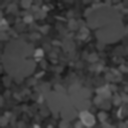

None

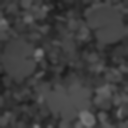

None

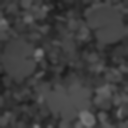

None

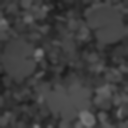

None

In [ ]:
pre_blur_image = green_img_array[1] #greyscale_img_array[1]

option3by3 = cv2.GaussianBlur(pre_blur_image, (3, 3), 0)
option5by5 = cv2.GaussianBlur(pre_blur_image, (5, 5), 0)
option7by7 = cv2.GaussianBlur(pre_blur_image, (7, 7), 0)
option9by9 = cv2.GaussianBlur(pre_blur_image, (7, 7), 0)
option11by11 = cv2.GaussianBlur(pre_blur_image, (7, 7), 0)

display(cv2_imshow(pre_blur_image))
display(cv2_imshow(option3by3))
display(cv2_imshow(option5by5))
display(cv2_imshow(option7by7))
display(cv2_imshow(option9by9))
display(cv2_imshow(option11by11))

In [ ]:
blurred_images_list = []

for clear_image in green_img_array: 
    #blur the image
    blurred_image = cv2.GaussianBlur(clear_image, (9, 9), 0)
    #add image to array
    blurred_images_list.append(blurred_image)


#convert from list to np array
blurred_images_array = np.array(blurred_images_list)


In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(blurred_images_array, y, test_size = 0.3, random_state = 88)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state = 88)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],128,128)
X_test = X_test.reshape(X_test.shape[0],128,128)
X_val = X_val.reshape(X_val.shape[0],128,128)

In [ ]:
X_train.shape

(3325, 128, 128)

In [ ]:
X_train.shape[1:]

(128, 128)

In [ ]:
X_train[0]

array([[64, 65, 67, ..., 58, 60, 60],
       [65, 66, 68, ..., 57, 59, 59],
       [67, 67, 68, ..., 55, 57, 57],
       ...,
       [67, 67, 67, ..., 45, 44, 43],
       [71, 71, 72, ..., 46, 44, 44],
       [73, 73, 74, ..., 47, 45, 44]], dtype=uint8)

In [ ]:
# Create the model
green_model = Sequential()

green_model.add(Conv2D(16, (3, 3), input_shape=(128,128,1), padding="same", activation='relu'))  #
green_model.add(MaxPooling2D())
green_model.add(Dropout(0.25))

green_model.add(Conv2D(24, (3, 3), padding="same",activation='relu'))
green_model.add(MaxPooling2D())
green_model.add(Dropout(0.25))

green_model.add(Conv2D(32, (3, 3), padding="same",activation='relu'))
green_model.add(MaxPooling2D())
green_model.add(Dropout(0.25))

green_model.add(Flatten())
green_model.add(Dense(128, activation='relu'))
green_model.add(Dense(12, activation='softmax'))

In [ ]:
green_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
green_model.fit(X_train, y_train,
          batch_size=400,
          epochs=20,
          validation_data=(X_val, y_val),
          shuffle=True,
          verbose=1)
          #callbacks=[early_stopping,model_checkpoint])